In [ ]:
import numpy as np
import ctypes
import time

# Load the DLL
dll_path = r"\P3D_Skel.dll"#put the correct path of the P3D_Skel.dll.You can find it at the dlls folder or in the Skeltonization folder.
p3d_skel_dll = ctypes.CDLL(dll_path)

# Define function signatures
p3d_skel_dll.p3dLKCSkeletonization.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),  # Input image
    ctypes.POINTER(ctypes.c_ubyte),  # Output skeletonized image
    ctypes.c_int,  # x dimension
    ctypes.c_int,  # y dimension
    ctypes.c_int,  # z dimension
    ctypes.c_void_p  # Log function pointer, set to None
]
p3d_skel_dll.p3dLKCSkeletonization.restype = ctypes.c_int

p3d_skel_dll.p3dSimpleSkeletonPruning.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),  # Input skeletonized image
    ctypes.POINTER(ctypes.c_ubyte),  # Output pruned skeleton image
    ctypes.c_int,  # x dimension
    ctypes.c_int,  # y dimension
    ctypes.c_int,  # z dimension
    ctypes.c_int,  # Pruning threshold
    ctypes.c_void_p  # Log function pointer, set to None
]
p3d_skel_dll.p3dSimpleSkeletonPruning.restype = ctypes.c_int

p3d_skel_dll.p3dSkeletonLabeling.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),  # Input pruned skeleton image
    ctypes.POINTER(ctypes.c_ubyte),  # Output labeled skeleton image
    ctypes.c_int,  # x dimension
    ctypes.c_int,  # y dimension
    ctypes.c_int,  # z dimension
    ctypes.c_void_p  # Log function pointer, set to None
]
p3d_skel_dll.p3dSkeletonLabeling.restype = ctypes.c_int

# Load the image
image_path = r"C:\Users\Abdel Rahman Rashwan\Desktop\Bachelor\Data\Output_median_otsu_eroded_dilated.raw"
x, y, z = 700, 700, 700  # Dimensions of the image
input_image = np.fromfile(image_path, dtype=np.uint8).reshape((z, y, x))

# Allocate output arrays
output_skeleton = np.zeros_like(input_image, dtype=np.uint8)
output_pruned_skeleton = np.zeros_like(input_image, dtype=np.uint8)
output_labeled_skeleton = np.zeros_like(input_image, dtype=np.uint8)

# Skeletonization
start_time = time.time()
result = p3d_skel_dll.p3dLKCSkeletonization(
    input_image.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    output_skeleton.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    x, y, z,
    None  # No log function
)
skeletonization_time = time.time() - start_time
if result != 2:  # P3D_SUCCESS is defined as 2
    raise RuntimeError(f"p3dLKCSkeletonization failed with code {result}")
print(f"Skeletonization time: {skeletonization_time:.2f} seconds")

# Pruning
pruning_threshold = 5
start_time = time.time()
result = p3d_skel_dll.p3dSimpleSkeletonPruning(
    output_skeleton.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    output_pruned_skeleton.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    x, y, z, pruning_threshold,
    None  # No log function
)
pruning_time = time.time() - start_time
if result != 2:
    raise RuntimeError(f"p3dSimpleSkeletonPruning failed with code {result}")
print(f"Pruning time: {pruning_time:.2f} seconds")

# Labeling
start_time = time.time()
result = p3d_skel_dll.p3dSkeletonLabeling(
    output_pruned_skeleton.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    output_labeled_skeleton.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    x, y, z,
    None  # No log function
)
labeling_time = time.time() - start_time
if result != 2:
    raise RuntimeError(f"p3dSkeletonLabeling failed with code {result}")
print(f"Labeling time: {labeling_time:.2f} seconds")

# Save the output images
output_skeleton.tofile("output_skeleton.raw")
output_pruned_skeleton.tofile("output_pruned_skeleton.raw")
output_labeled_skeleton.tofile("output_labeled_skeleton.raw")


Skeletonization time: 573.66 seconds
Pruning time: 2.94 seconds
Labeling time: 3.45 seconds


In [4]:
import ctypes
import numpy as np
import time

# Load the DLL
dll_path = r"C:\Users\Abdel Rahman Rashwan\Desktop\BlobAnalysisProject\p3d_blob.dll"
p3d_blob_dll = ctypes.CDLL(dll_path)

# Define the BasicStats structure
class BasicStats(ctypes.Structure):
    _fields_ = [
        ("Vv", ctypes.c_double),  # Volume fraction
        ("Cv", ctypes.c_double),  # Connectivity density
        ("Mv", ctypes.c_double),  # Mean volume
        ("Sv", ctypes.c_double)   # Surface area
    ]

# Define the AnisotropyStats structure
class AnisotropyStats(ctypes.Structure):
    _fields_ = [
        ("I", ctypes.c_double),  # Isotropy Index
        ("E", ctypes.c_double)   # Elongation Index
    ]

# Function prototypes
p3d_blob_dll.p3dBasicAnalysis.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),  # Input image
    ctypes.POINTER(BasicStats),     # Output stats
    ctypes.c_int,                   # x dimension
    ctypes.c_int,                   # y dimension
    ctypes.c_int,                   # z dimension
    ctypes.c_double,                # Voxel size
    ctypes.c_void_p                 # Log function pointer (None for now)
]
p3d_blob_dll.p3dBasicAnalysis.restype = ctypes.c_int

p3d_blob_dll.p3dAnisotropyAnalysis.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),  # Input image
    ctypes.POINTER(ctypes.c_ubyte),  # Mask image (optional, can be None)
    ctypes.POINTER(AnisotropyStats),# Output stats
    ctypes.c_int,                   # x dimension
    ctypes.c_int,                   # y dimension
    ctypes.c_int,                   # z dimension
    ctypes.c_double,                # Voxel size
    ctypes.c_int,                   # Verbose flag
    ctypes.c_void_p                 # Log function pointer (None for now)
]
p3d_blob_dll.p3dAnisotropyAnalysis.restype = ctypes.c_int

# Load the input image
input_image_path = r"C:\Users\Abdel Rahman Rashwan\Desktop\Bachelor\Data\Output_median_otsu_eroded_dilated.raw"
dim_x, dim_y, dim_z = 700, 700, 700
voxel_size = 1.0

# Read the binary image
input_image = np.fromfile(input_image_path, dtype=np.uint8).reshape((dim_z, dim_y, dim_x))

# Allocate memory for the output stats
basic_stats = BasicStats()
anisotropy_stats = AnisotropyStats()

# Perform Basic Analysis
start_time = time.time()
status_basic = p3d_blob_dll.p3dBasicAnalysis(
    input_image.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    ctypes.byref(basic_stats),
    dim_x,
    dim_y,
    dim_z,
    voxel_size,
    None  # Log function not used
)
basic_time = time.time() - start_time

if status_basic != 2:  # P3D_SUCCESS
    raise RuntimeError("p3dBasicAnalysis failed.")

# Perform Anisotropy Analysis
start_time = time.time()
status_anisotropy = p3d_blob_dll.p3dAnisotropyAnalysis(
    input_image.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    None,  # No mask provided
    ctypes.byref(anisotropy_stats),
    dim_x,
    dim_y,
    dim_z,
    voxel_size,
    0,  # Verbose flag
    None  # Log function not used
)
anisotropy_time = time.time() - start_time

if status_anisotropy != 2:  # P3D_SUCCESS
    raise RuntimeError("p3dAnisotropyAnalysis failed.")

# Print results
print("Basic Analysis Results:")
print(f"  Volume Fraction (Vv): {basic_stats.Vv}")
print(f"  Connectivity Density (Cv): {basic_stats.Cv}")
print(f"  Mean Volume (Mv): {basic_stats.Mv}")
print(f"  Surface Area (Sv): {basic_stats.Sv}")
print(f"Execution Time: {basic_time:.2f} seconds")

print("\nAnisotropy Analysis Results:")
print(f"  Isotropy Index (I): {anisotropy_stats.I}")
print(f"  Elongation Index (E): {anisotropy_stats.E}")
print(f"Execution Time: {anisotropy_time:.2f} seconds")


Basic Analysis Results:
  Volume Fraction (Vv): 0.6996922008200465
  Connectivity Density (Cv): -4.4926963072949694e-05
  Mean Volume (Mv): 0.00040050123216791905
  Surface Area (Sv): 0.07042220962783717
Execution Time: 19.45 seconds

Anisotropy Analysis Results:
  Isotropy Index (I): 0.8503340048340431
  Elongation Index (E): 0.035186343996622016
Execution Time: 16.14 seconds


In [1]:
import ctypes
import numpy as np
import time

# Load the DLL
dll_path = r"C:\Users\Abdel Rahman Rashwan\Desktop\BlobAnalysisProject\p3d_blob.dll"
p3d_blob_dll = ctypes.CDLL(dll_path)

# Define the BasicStats structure
class BasicStats(ctypes.Structure):
    _fields_ = [
        ("Vv", ctypes.c_double),  # Volume fraction
        ("Cv", ctypes.c_double),  # Connectivity density
        ("Mv", ctypes.c_double),  # Mean volume
        ("Sv", ctypes.c_double)   # Surface area
    ]

# Define the AnisotropyStats structure
class AnisotropyStats(ctypes.Structure):
    _fields_ = [
        ("I", ctypes.c_double),  # Isotropy Index
        ("E", ctypes.c_double)   # Elongation Index
    ]

# Function prototypes
p3d_blob_dll.p3dBasicAnalysis.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),  # Input image
    ctypes.POINTER(BasicStats),     # Output stats
    ctypes.c_int,                   # x dimension
    ctypes.c_int,                   # y dimension
    ctypes.c_int,                   # z dimension
    ctypes.c_double,                # Voxel size
    ctypes.c_void_p                 # Log function pointer (None for now)
]
p3d_blob_dll.p3dBasicAnalysis.restype = ctypes.c_int

p3d_blob_dll.p3dAnisotropyAnalysis.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),  # Input image
    ctypes.POINTER(ctypes.c_ubyte),  # Mask image (optional, can be None)
    ctypes.POINTER(AnisotropyStats),# Output stats
    ctypes.c_int,                   # x dimension
    ctypes.c_int,                   # y dimension
    ctypes.c_int,                   # z dimension
    ctypes.c_double,                # Voxel size
    ctypes.c_int,                   # Verbose flag
    ctypes.c_void_p                 # Log function pointer (None for now)
]
p3d_blob_dll.p3dAnisotropyAnalysis.restype = ctypes.c_int

# Load the input image
input_image_path = r"C:\Users\Abdel Rahman Rashwan\Desktop\BlobAnalysisProject\Data\Input\SC1_700x700x700.raw"
dim_x, dim_y, dim_z = 700, 700, 700
voxel_size = 1.0

# Read the binary image
input_image = np.fromfile(input_image_path, dtype=np.uint8)
if input_image.size != dim_x * dim_y * dim_z:
    raise ValueError("Input image dimensions do not match expected size.")
input_image = input_image.reshape((dim_z, dim_y, dim_x))

# Allocate memory for the output stats
basic_stats = BasicStats()
anisotropy_stats = AnisotropyStats()

# Perform Basic Analysis
start_time = time.time()
status_basic = p3d_blob_dll.p3dBasicAnalysis(
    input_image.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    ctypes.byref(basic_stats),
    dim_x,
    dim_y,
    dim_z,
    voxel_size,
    None  # Log function not used
)
basic_time = time.time() - start_time

if status_basic != 2:  # P3D_SUCCESS
    raise RuntimeError("p3dBasicAnalysis failed.")

# Perform Anisotropy Analysis
start_time = time.time()
status_anisotropy = p3d_blob_dll.p3dAnisotropyAnalysis(
    input_image.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    None,  # No mask provided
    ctypes.byref(anisotropy_stats),
    dim_x,
    dim_y,
    dim_z,
    voxel_size,
    0,  # Verbose flag
    None  # Log function not used
)
anisotropy_time = time.time() - start_time

if status_anisotropy != 2:  # P3D_SUCCESS
    raise RuntimeError("p3dAnisotropyAnalysis failed.")

# Print results
print("Basic Analysis Results:")
print(f"  Volume Fraction (Vv): {basic_stats.Vv}")
print(f"  Connectivity Density (Cv): {basic_stats.Cv}")
print(f"  Mean Volume (Mv): {basic_stats.Mv}")
print(f"  Surface Area (Sv): {basic_stats.Sv}")
print(f"Execution Time: {basic_time:.2f} seconds")

print("\nAnisotropy Analysis Results:")
print(f"  Isotropy Index (I): {anisotropy_stats.I}")
print(f"  Elongation Index (E): {anisotropy_stats.E}")
print(f"Execution Time: {anisotropy_time:.2f} seconds")


Basic Analysis Results:
  Volume Fraction (Vv): 0.05531048195853474
  Connectivity Density (Cv): -3.1692482292857636e-05
  Mean Volume (Mv): 0.006756043481087131
  Surface Area (Sv): 0.042257728292624155
Execution Time: 20.70 seconds

Anisotropy Analysis Results:
  Isotropy Index (I): 0.8451704534454235
  Elongation Index (E): 0.026415392313721364
Execution Time: 14.12 seconds


In [5]:
import ctypes
import numpy as np
import time

# Load the DLL
dll_path = r"C:\Users\Abdel Rahman Rashwan\Desktop\BlobAnalysisProject\p3d_blob.dll"
p3d_blob_dll = ctypes.CDLL(dll_path)

# Define the BasicStats structure
class BasicStats(ctypes.Structure):
    _fields_ = [
        ("Cv", ctypes.c_double),  # Connectivity Density
        ("Mv", ctypes.c_double),  # Mean Volume
        ("Sv", ctypes.c_double),  # Surface Area
        ("Vv", ctypes.c_double)   # Volume Fraction
    ]

# Define the logging function
@ctypes.CFUNCTYPE(None, ctypes.c_char_p)
def log_function(msg):
    print("Log:", msg.decode())

# Function prototype
p3d_blob_dll.p3dBasicAnalysis.argtypes = [
    ctypes.POINTER(ctypes.c_ubyte),
    ctypes.POINTER(BasicStats),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.CFUNCTYPE(None, ctypes.c_char_p)  # Log function
]
p3d_blob_dll.p3dBasicAnalysis.restype = ctypes.c_int

# Load the input image
input_image_path = r"C:\Users\Abdel Rahman Rashwan\Desktop\Bachelor\Data\Output_median_otsu_eroded_dilated.raw"
dim_x, dim_y, dim_z = 700, 700, 700
voxel_size = 0.6999622028020465

input_image = np.fromfile(input_image_path, dtype=np.uint8)
if input_image.size != dim_x * dim_y * dim_z:
    raise ValueError("Input image dimensions do not match expected size.")
input_image = input_image.reshape((dim_z, dim_y, dim_x))

# Allocate memory for the output stats
basic_stats = BasicStats()

# Perform Basic Analysis
print("Starting Basic Analysis...")
start_time = time.time()
status_basic = p3d_blob_dll.p3dBasicAnalysis(
    input_image.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
    ctypes.byref(basic_stats),
    dim_x,
    dim_y,
    dim_z,
    voxel_size,
    log_function  # Enable logging
)
basic_time = time.time() - start_time

if status_basic != 0:  # Assuming 0 indicates success
    print(f"Basic Analysis failed with error code: {status_basic}")
else:
    print("Basic Analysis completed successfully.")
    print(f"Connectivity Density (Cv): {basic_stats.Cv}")
    print(f"Mean Volume (Mv): {basic_stats.Mv}")
    print(f"Surface Area (Sv): {basic_stats.Sv}")
    print(f"Volume Fraction (Vv): {basic_stats.Vv}")
    print(f"Execution Time: {basic_time:.2f} seconds")

# Check the results of basic_stats for debugging
print("Debugging BasicStats:")
print(f"Vv (Volume Fraction): {basic_stats.Vv}")
print(f"Sv (Surface Area): {basic_stats.Sv}")
print(f"Mv (Mean Volume): {basic_stats.Mv}")
print(f"Cv (Connectivity Density): {basic_stats.Cv}")


Starting Basic Analysis...
Log: Pore3D - Performing basic analysis...
Log: 	Adopted voxelsize: %0.6f mm.
Log: 	----
Log: 	Density (Vv): %0.3f [-].
Log: 	Specific Surface Area (Sv): %0.3f [mm^-1].
Log: 	Integral of Mean Curvature (Mv): %0.3f [mm^-2].
Log: 	Euler characteristic (Cv): %0.3f [mm^-3].
Log: Pore3D - Basic analysis computed successfully in %dm%0.3fs.
Basic Analysis failed with error code: 2
Debugging BasicStats:
Vv (Volume Fraction): 0.10060858907227743
Sv (Surface Area): 0.0008174377277509838
Mv (Mean Volume): -0.0001310036194969279
Cv (Connectivity Density): 0.6996922008200465


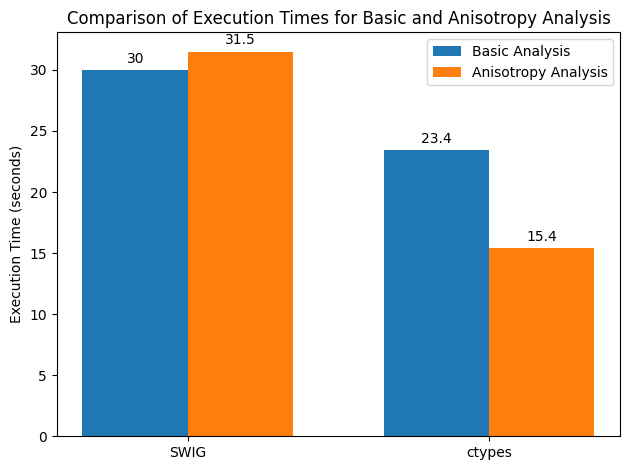

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the graph
methods = ['SWIG', 'ctypes']
basic_analysis = [30.0, 23.4]  # Execution times for basic analysis
anisotropy_analysis = [31.5, 15.4]  # Execution times for anisotropy analysis

x = np.arange(len(methods))  # the label locations
width = 0.35  # the width of the bars

# Create the bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, basic_analysis, width, label='Basic Analysis')
rects2 = ax.bar(x + width/2, anisotropy_analysis, width, label='Anisotropy Analysis')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Execution Time (seconds)')
ax.set_title('Comparison of Execution Times for Basic and Anisotropy Analysis')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

# Add data labels
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

# Save the updated graph
plt.savefig('updated_basic_anisotropy_comparison.png')

# Show the graph
plt.show()
